# **Chapter 3 - Sampling the Imaginary**

In [1]:
import os
import sys
import warnings
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [3]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 120

#### **Code 3.1**

$$Pr(vampire|positive) = \frac{Pr(positive|vampire) * Pr(vampire)} {Pr(positive)}$$

$$Pr(positive) = Pr(positive|vampire) * Pr(vampire) + Pr(positive|mortal) * (1 − Pr(vampire))$$

In [4]:
pr_po_va = 0.95
pr_po_mo = 0.01
pr_va = 0.001
pr_po = pr_po_va * pr_va + pr_po_mo * (1 - pr_va)
pr_va_po = pr_po_va * pr_va / pr_po
pr_va_po

0.08683729433272395

#### **Code 3.2 - 3.5**

We are going to use the same function we use on chapter 2 (code 2.3)

In [5]:
def posterior_grid_approx(n_p_grid=5, success=6, tosses=9, method='uniform'):
    
    # define the parameter grid
    p_grid = np.linspace(0, 1, n_p_grid)

    # define prior
    if method=='uniform':
        prior = np.repeat(5, n_p_grid)
    elif method=='truncated':
        prior = (p_grid >= 0.5).astype(int)
    elif method=='double_exp':
        prior = np.exp(- 5 * abs(p_grid - 0.5))

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [6]:
p_grid, posterior = posterior_grid_approx(n_p_grid=int(1e6), success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

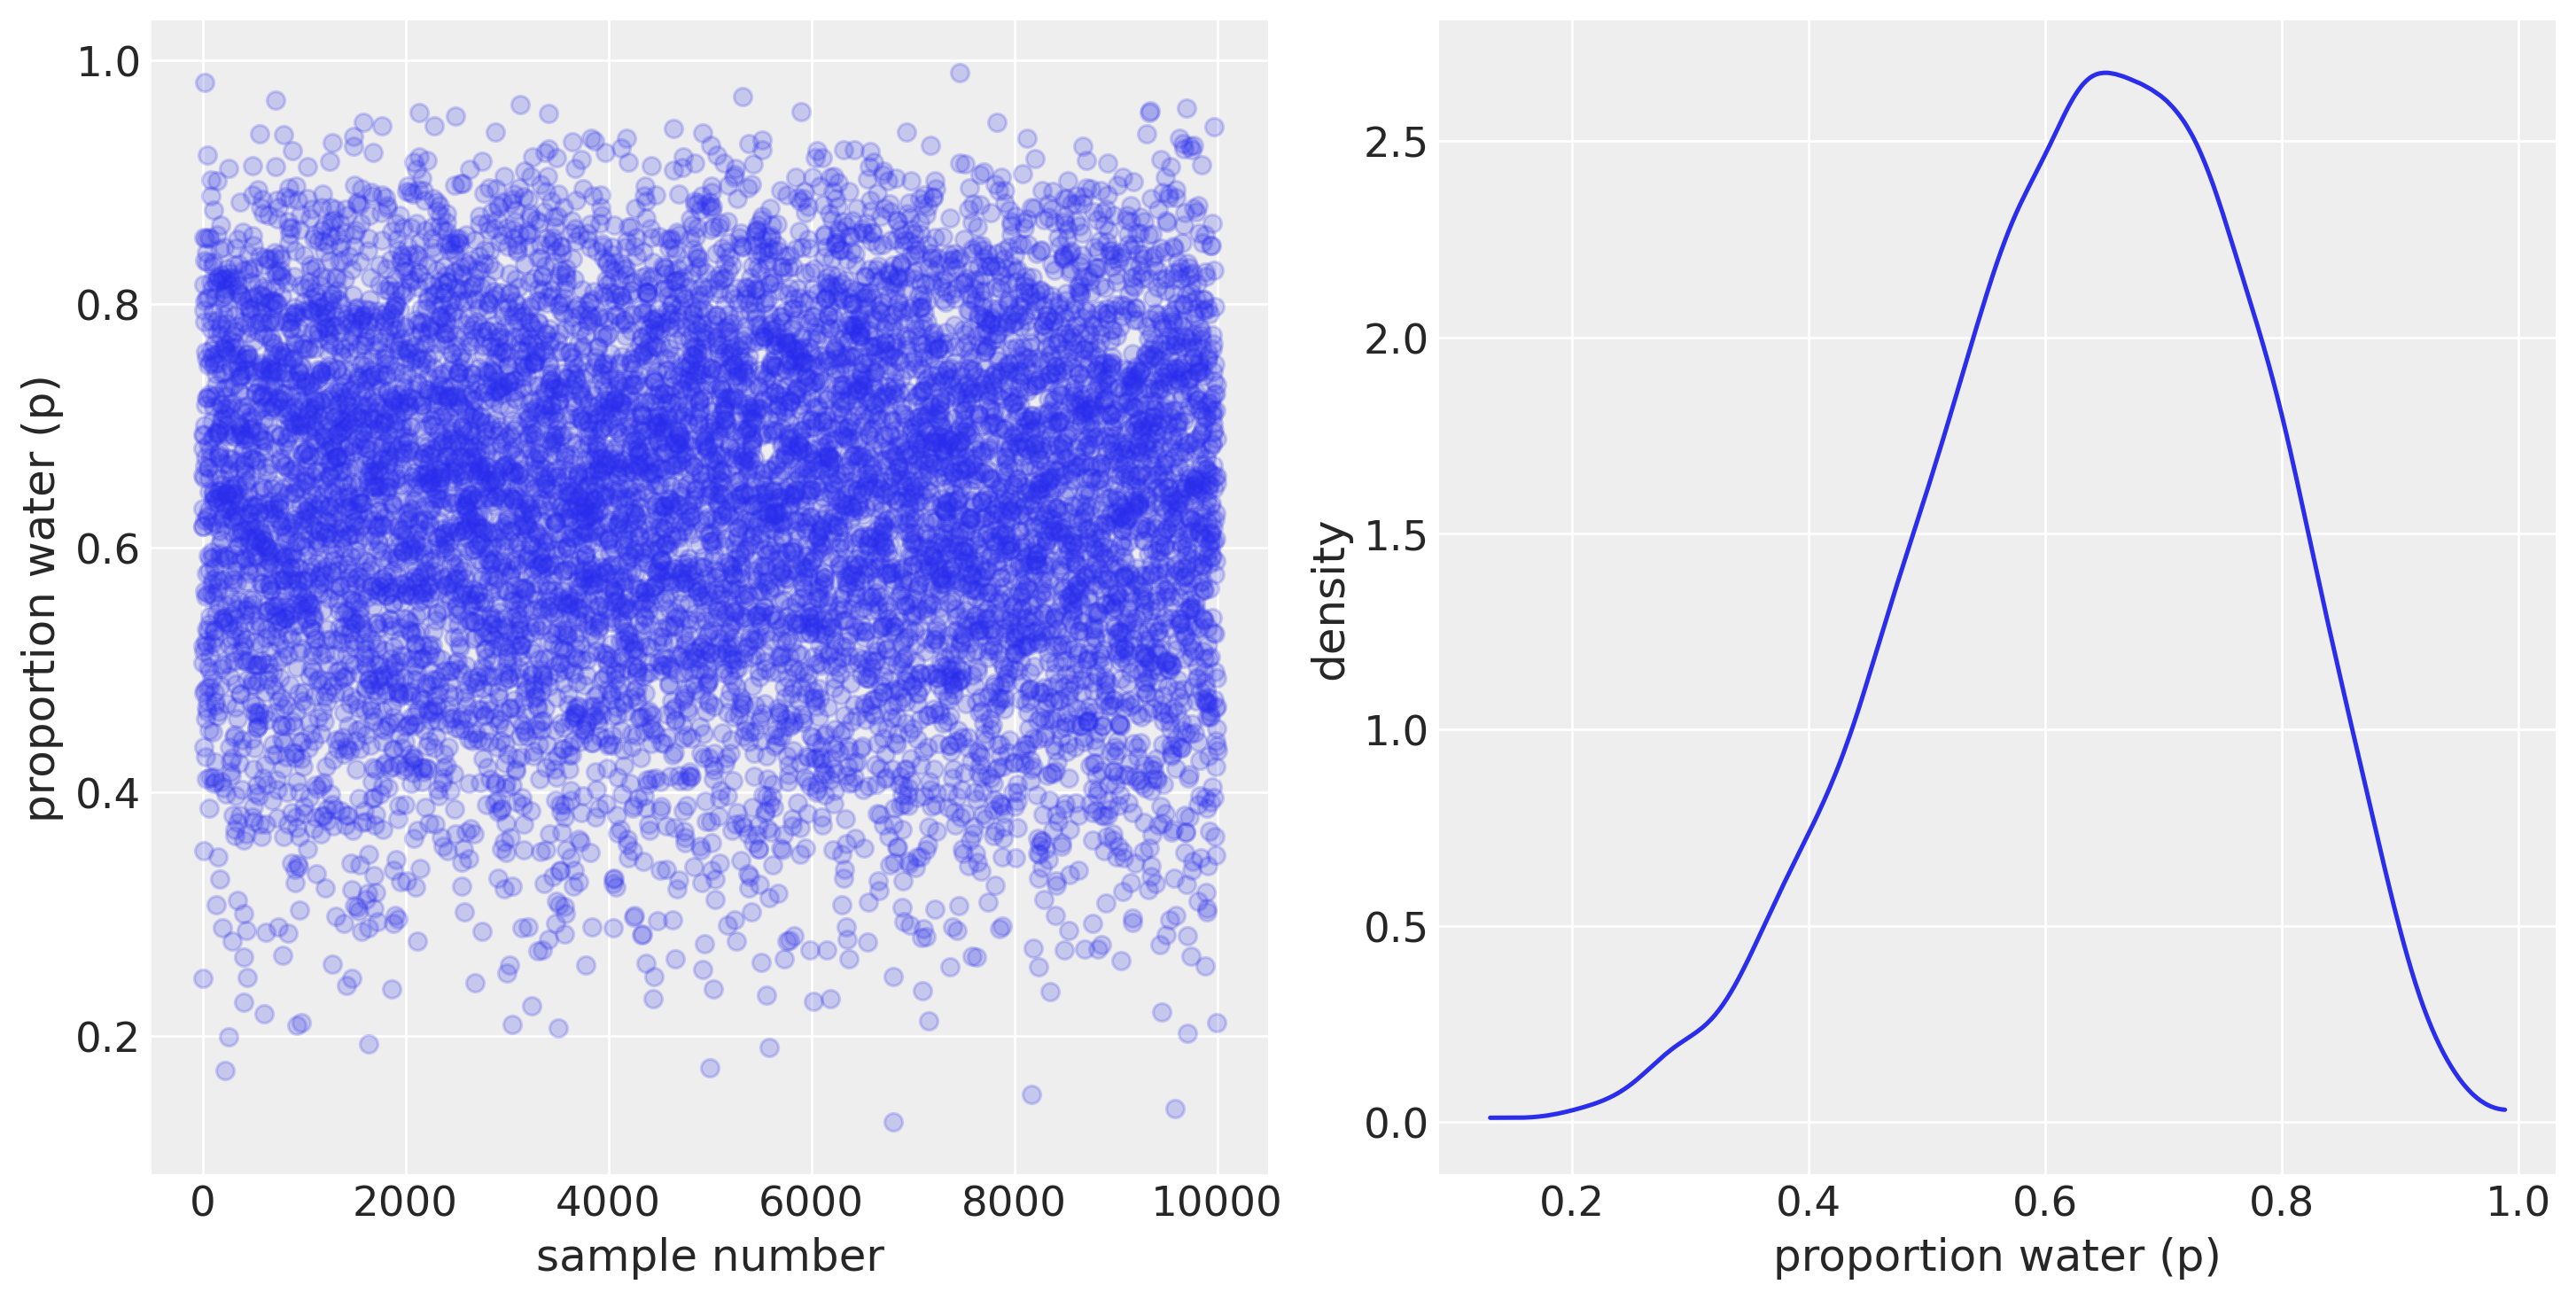

In [7]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

#### **Code 3.6**

In [8]:
sum(posterior[p_grid < 0.5])

0.1718749999995902

#### **Code 3.7**

In [9]:
sum(samples < 0.5) / 1e4

0.1699

#### **Code 3.8**

In [10]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.6026

#### **Code 3.9**

In [11]:
np.percentile(samples, 80)

0.763060763060763

#### **Code 3.10**

In [12]:
np.percentile(samples, [10, 90])

array([0.45044865, 0.81391281])

#### **Code 3.11**

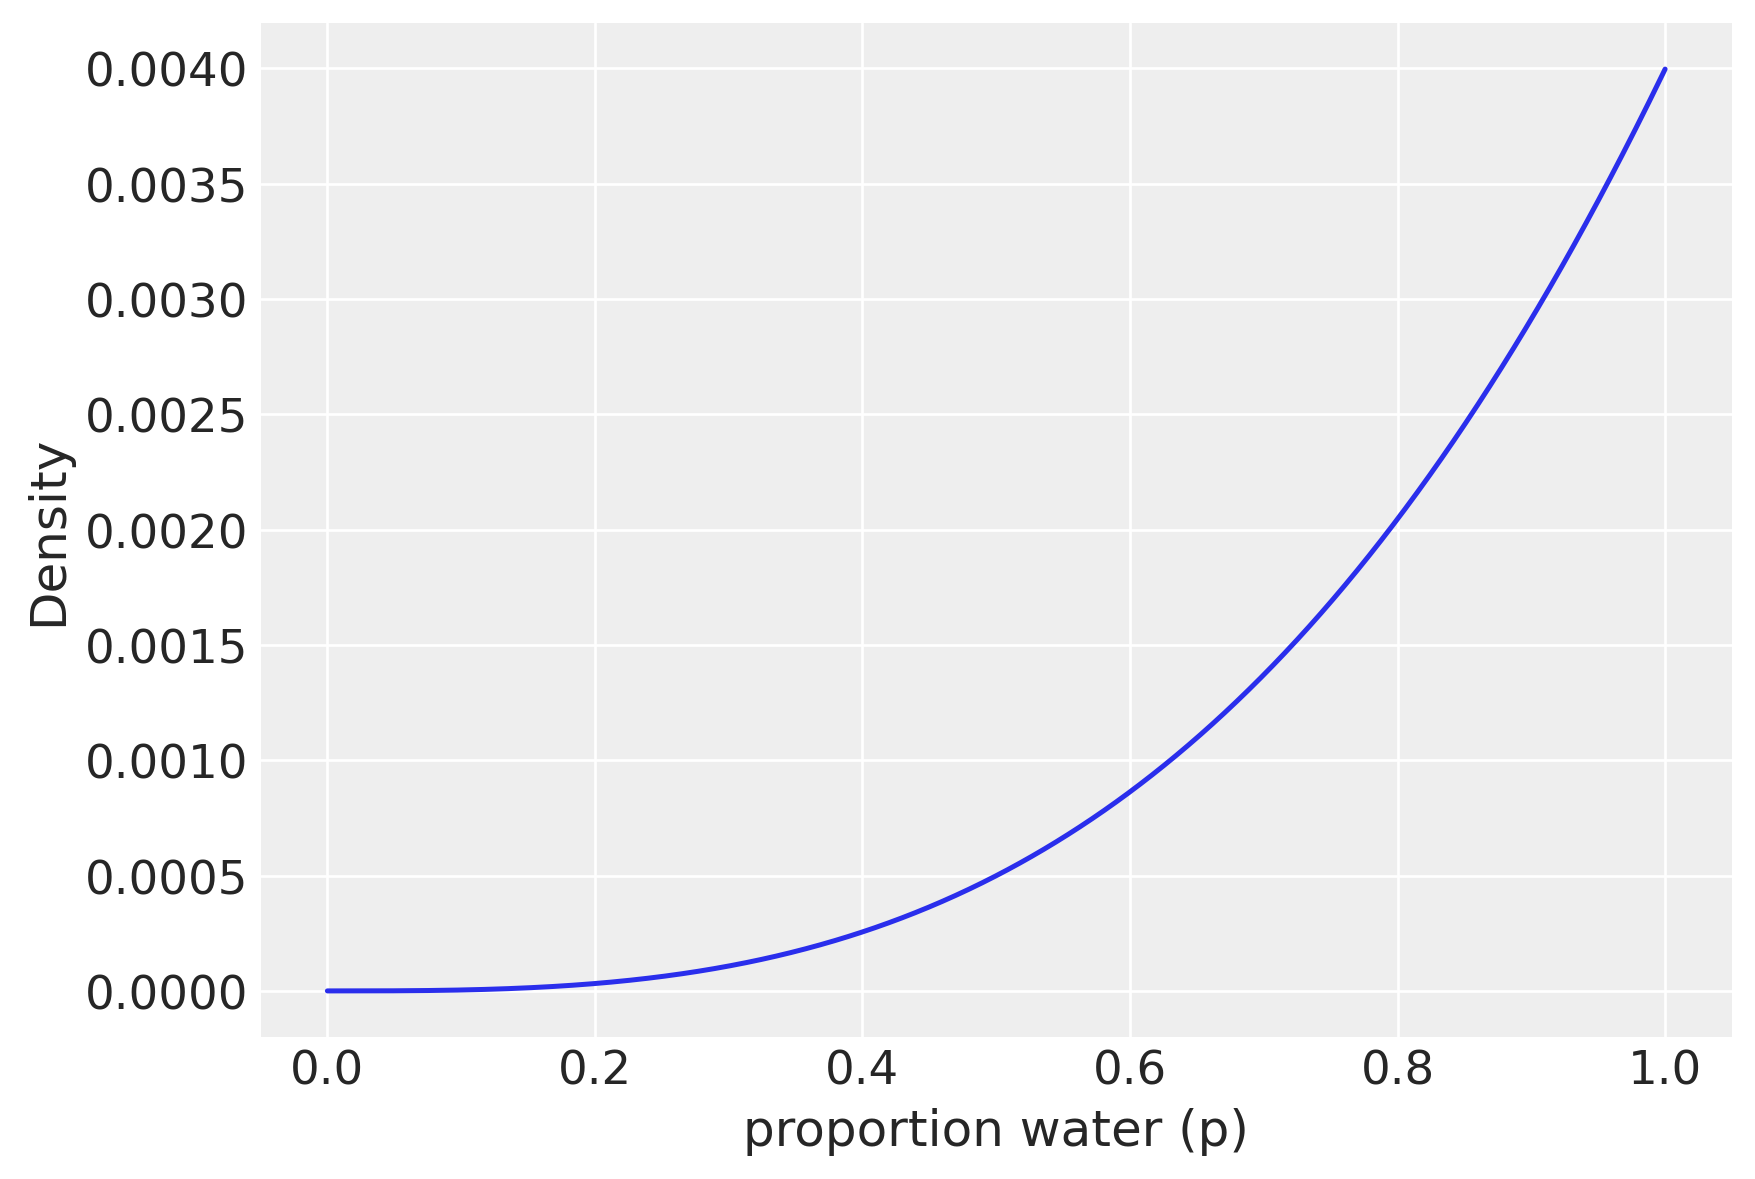

In [13]:
p_grid, posterior = posterior_grid_approx(n_p_grid=int(1e3), success=3, tosses=3)
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

#### **Code 3.12**

In [14]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([0.70670671, 0.93093093])

#### **Code 3.13**

[0.84084084 1.        ]


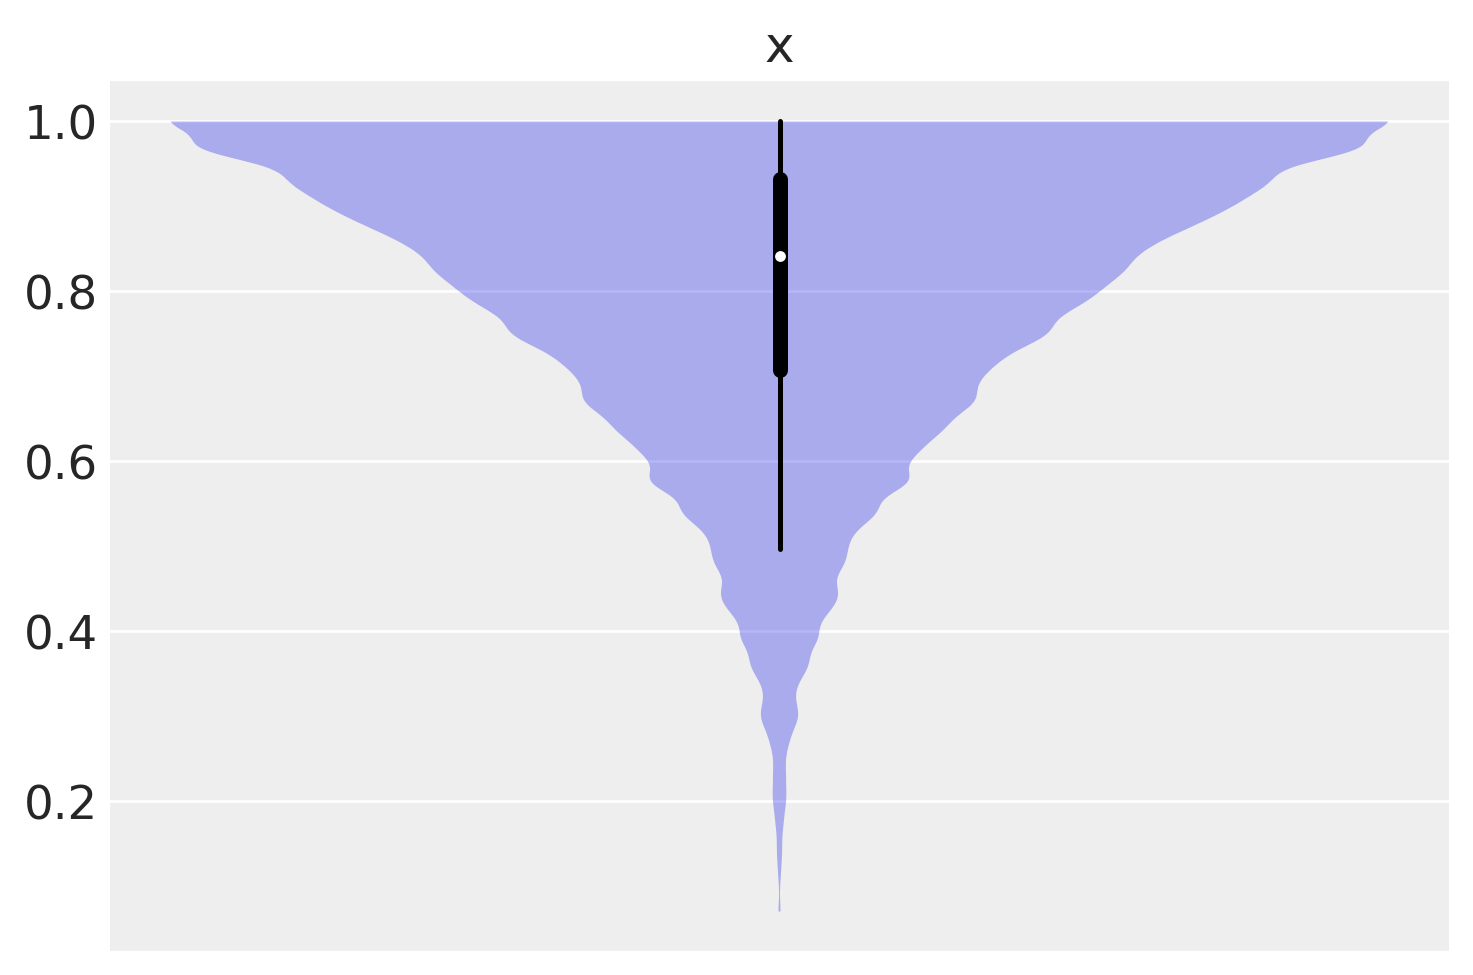

In [15]:
print(az.hdi(samples, hdi_prob=0.5))
az.plot_violin(samples)
plt.show()

#### **Code 3.14**

In [16]:
p_grid[posterior == max(posterior)]

array([1.])

#### **Code 3.15**

In [17]:
stats.mode(samples)[0]

array([0.96096096])

#### **Code 3.16**

In [18]:
np.mean(samples), np.median(samples)

(0.8003837837837838, 0.8408408408408409)

#### **Code 3.17**

In [19]:
sum(posterior * abs(0.5 - p_grid))

0.3128751874998122

#### **Code 3.18 and 3.19**

In [20]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
p_grid[loss == min(loss)]

array([0.84084084])

#### **Code 3.20**

In [21]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

#### **Code 3.21**

In [22]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([1])

#### **Code 3.22**

In [23]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 2, 1, 1, 1, 2, 2, 0, 2, 1])

#### **Code 3.23**

In [24]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.09088, 0.42142, 0.4877]

#### **Code 3.24, 3.25 and 3.26**

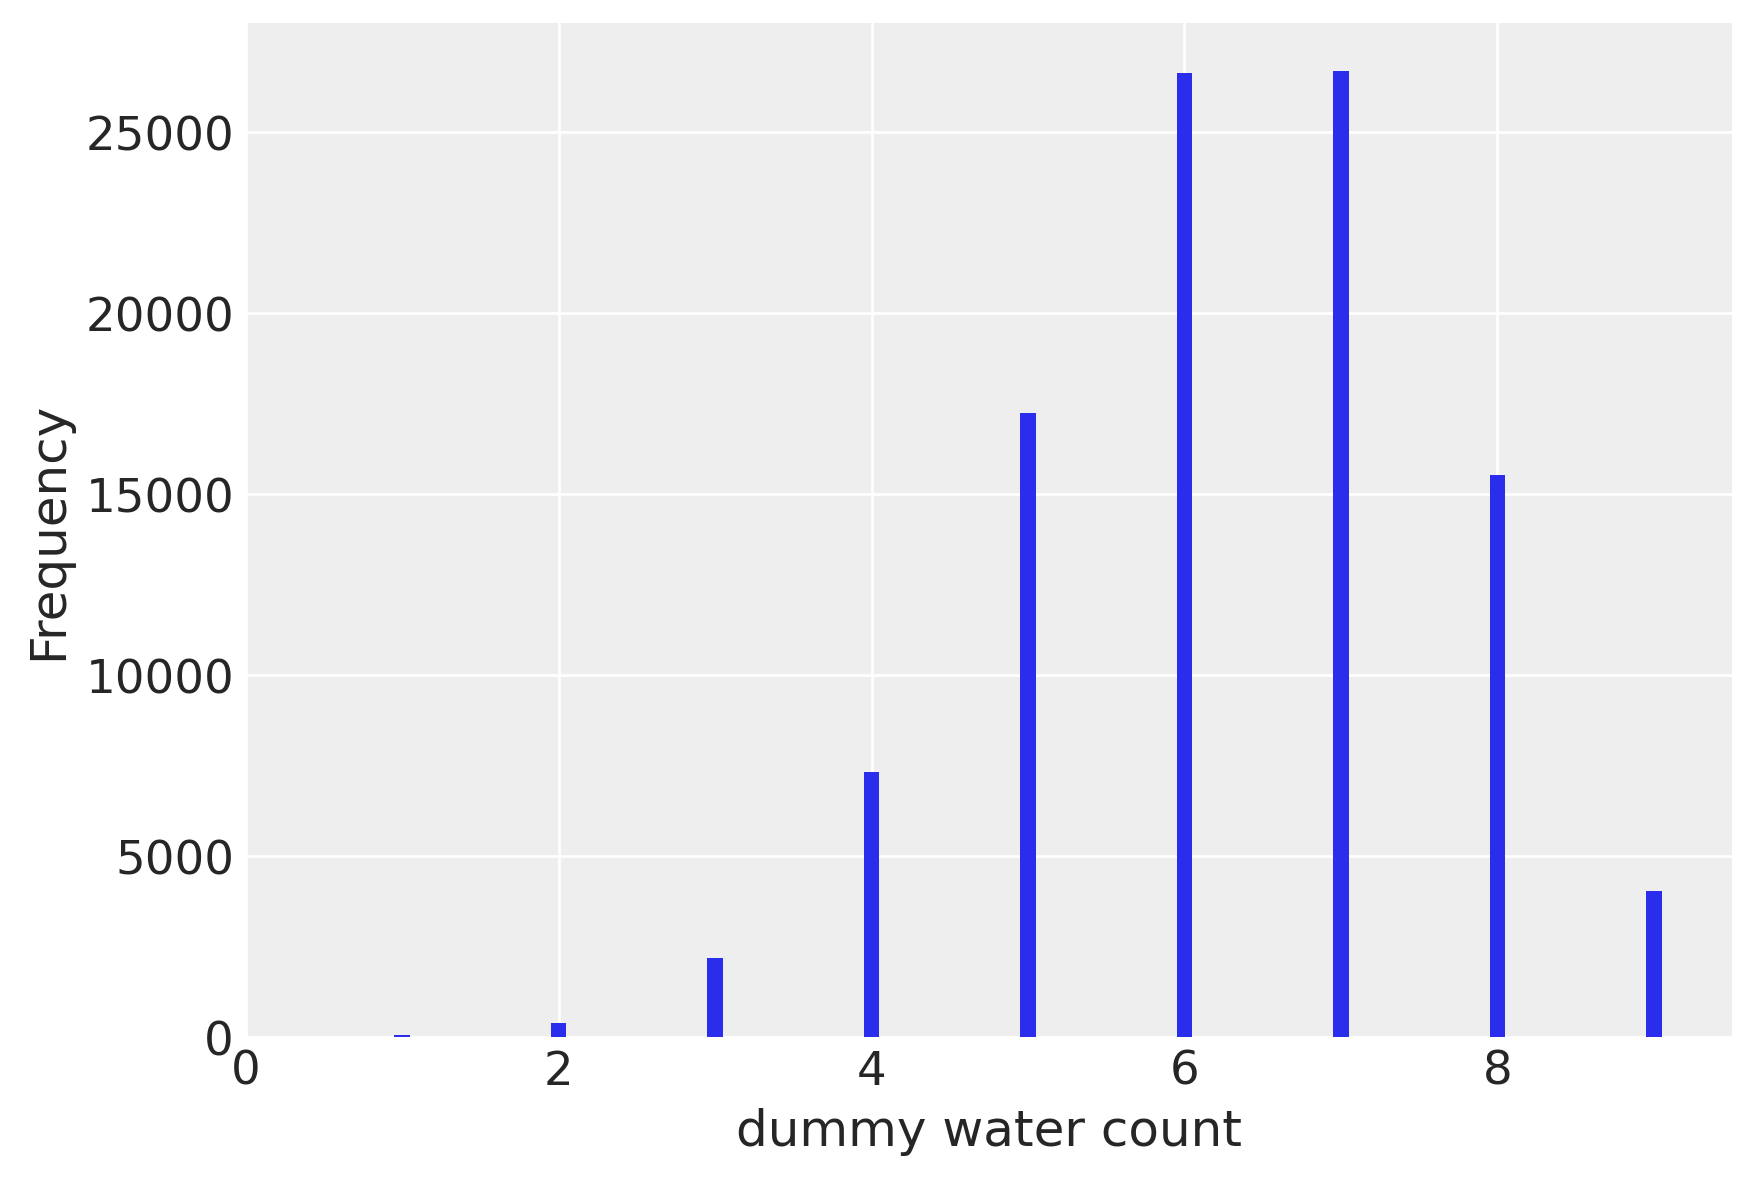

In [25]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
# dummy_w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))
# dummy_w = stats.binom.rvs(n=9, p=samples)
bar_width = 0.1
plt.hist(dummy_w, bins=np.arange(0, 11) - bar_width / 2, width=bar_width)
plt.xlim(0, 9.5)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

#### **Code 3.27**

In [27]:
p_grid, posterior = posterior_grid_approx(n_p_grid=100, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

#### **Code 3.28**

In [28]:
# fmt: off
birth1 = np.array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
                   1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])
birth2 = np.array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
                   1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
                   0, 0, 0, 1, 1, 1, 0, 0, 0, 0])
# fmt: on

#### **Code 3.30**

In [29]:
sum(birth1) + sum(birth2)

111

In [30]:
%watermark -n -u -v -iv -w

Last updated: Sat Mar 26 2022

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.1.1

arviz     : 0.11.4
matplotlib: 3.5.1
scipy     : 1.7.3
sys       : 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
numpy     : 1.21.2
pymc3     : 3.11.5

Watermark: 2.3.0



## **References:**
[Posterior Distribution vs Posterior Predictive Distribution](https://stats.stackexchange.com/questions/71033/what-is-the-difference-between-posterior-and-posterior-predictive-distribution)